In [32]:
import pickle
with open('../data/train_test_split_hierarchical.pkl', 'rb') as infile:
    train_x, train_y, train_y_, val_x, val_y, val_y_, test_x, test_y, test_y_ = pickle.load(infile)

In [33]:
with open('./results/predictions_cascading.pkl', 'rb') as infile2:
    preds = pickle.load(infile2)

In [110]:
import numpy as np
predicted_class_indices = np.zeros((141, 4000))
test_y = np.zeros((141, 4000))
for i,pred in enumerate(preds):
    predicted_class_indices[:,i] = np.where(pred[0] > 0.5, 1, 0)
    test_y[:,i] = pred[1]

In [133]:
predicted_class_indices.shape, test_y.shape

((141, 4000), (141, 4000))

In [132]:
predicted_class_indices

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [1., 1., 1., ..., 1., 0., 0.],
       ...,
       [1., 1., 1., ..., 1., 0., 0.],
       [1., 1., 1., ..., 1., 0., 0.],
       [1., 1., 1., ..., 1., 0., 0.]])

In [113]:
def mean_per_class_accuracy(y, y_hat, num_classes):
    accuracy = [0]*num_classes
    for i in range(num_classes):
        accuracy[i] = 0
        for j in range(len(y)):
            if y[j][i] == y_hat[j][i]:
                accuracy[i] += 1
        accuracy[i] /= len(y)
    return accuracy

In [114]:
per_class_accuracy = mean_per_class_accuracy(
    test_y, predicted_class_indices, 141
)
per_class_accuracy, sum(per_class_accuracy)/141

([0.475177304964539,
  0.4326241134751773,
  0.41843971631205673,
  0.46099290780141844,
  0.425531914893617,
  0.4326241134751773,
  0.41134751773049644,
  0.3971631205673759,
  0.41134751773049644,
  0.41134751773049644,
  0.4326241134751773,
  0.425531914893617,
  0.4326241134751773,
  0.4326241134751773,
  0.3971631205673759,
  0.44680851063829785,
  0.41134751773049644,
  0.4397163120567376,
  0.40425531914893614,
  0.46099290780141844,
  0.3900709219858156,
  0.425531914893617,
  0.425531914893617,
  0.41134751773049644,
  0.46099290780141844,
  0.4326241134751773,
  0.41843971631205673,
  0.4326241134751773,
  0.4397163120567376,
  0.4397163120567376,
  0.4397163120567376,
  0.3971631205673759,
  0.4397163120567376,
  0.41843971631205673,
  0.41843971631205673,
  0.44680851063829785,
  0.41843971631205673,
  0.45390070921985815,
  0.44680851063829785,
  0.4326241134751773,
  0.425531914893617,
  0.3900709219858156,
  0.41134751773049644,
  0.41843971631205673,
  0.41843971631205

In [115]:
from sklearn import metrics

In [116]:
metrics.average_precision_score(test_y, predicted_class_indices, average='weighted')

C:\Users\Ludovica\Anaconda3\envs\tf\lib\site-packages\sklearn\metrics\_ranking.py:677: RuntimeWarning: invalid value encountered in true_divide
  recall = tps / tps[-1]


0.03668589666959524

In [117]:
print(sklearn.metrics.classification_report(test_y, predicted_class_indices))

C:\Users\Ludovica\Anaconda3\envs\tf\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Ludovica\Anaconda3\envs\tf\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       0.04      1.00      0.08         3
           1       0.01      1.00      0.02         1
           2       0.02      0.50      0.05         4
           3       0.04      0.75      0.07         4
           4       0.02      0.67      0.05         3
           5       0.01      0.20      0.02         5
           6       0.01      0.33      0.02         3
           7       0.00      0.00      0.00         2
           8       0.05      0.57      0.09         7
           9       0.01      1.00      0.02         1
          10       0.04      0.43      0.07         7
          11       0.05      0.57      0.09         7
          12       0.01      0.50      0.02         2
          13       0.04      0.75      0.07         4
          14       0.01      0.17      0.02         6
          15       0.03      0.67      0.05         3
          16       0.01      0.25      0.02         4
          17       0.05    

C:\Users\Ludovica\Anaconda3\envs\tf\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Ludovica\Anaconda3\envs\tf\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in samples with no true labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [156]:
classes = ['named individuals','portraits','actions: postures and motions', 'adults', 'groups','body','children','nudes',\
           'actions: processes and functions','actions: expressive','ethnicity','diseases and conditions','named groups',\
           'named families', 'clothing and personal effects','fine art and design, named works','furnishings', \
           'religious and ceremonial', 'reading, writing, printed matter','vessels and containers','food and drink',\
           'kitchen','fine arts and music','weapons','electrical appliances','agriculture, gardening & fishing',\
           'sports and games','toys and models','domestic','scientific and measuring','heating and lighting','miscellaneous',\
           'tools and machinery','medical','materials','UK counties','UK countries and regions','UK cities, towns and villages',\
           'countries and continents','cities, towns, villages (non-UK)','natural features (non-UK)','UK London', \
           'mythical, religious, fictional','UK natural features','UK man-made landmarks','man-made landmarks (non-UK)',\
           'historical: imagined views','religious','townscapes, man-made features','bridges and viaducts','industrial', \
           'residential','public and municipal','features', 'garden structures','monuments','periods and styles','ruins',\
           'places of entertainment','agricultural','military','non-representational','from recognisable sources',\
           'transport: water','transport: land','social comment','birth to death','sex and relationships','lifestyle and culture',\
           'dress: ceremonial/royal','nationality','family','government and politics','health and welfare','crime and punishment',
           'dress: nations/regions','transport: air','dress: fantasy/fancy','education, science and learning','water: inland',\
           'natural phenomena','plants and flowers','animals: features','animals: mammals','landscape','times of the day',\
           'trees','animals: birds','animals: actions','animals: fantastic','seascapes and coasts','weather','seasons',\
           'animals: fish and aquatic life','animals: insects & lower animals','astronomy','animals: reptiles',\
           'emotions and human qualities','universal concepts','ideas  -  formal qualities','workspaces','domestic', \
           'public and municipal','places of entertainment',  'religious',' equestrian and sporting','arts and entertainment', \
           'agriculture and fishing','royalty and social rank','domestic','public service','literary','trading and commercial', \
           'industrial and crafts','military','religious','educational and scientific','crime and punishment', 'medical', \
           'birth to death','abstract concepts','inscriptions','countries','religious','politics','society',\
           'emotional states and conditions','nature','people','mythological','gender','classical myths: gods and heroes',\
           'classical myths: events, themes', 'world religions','universal religious imagery','Judaeo-Christian imagery',\
           'Bible: New Testament','magic and occultism','mysticism','Bible: Old Testament','Saints','classical myths: creatures',\
           'sport', 'music and entertainment','recreational activities','art and craft','eating and drinking','politics and society',\
           'military: World War I','military: World War II','arts','military','religious','classical','characters','classical',\
           'literature (not Shakespeare)','film, music and ballet','tales, legends and traditional','Shakespeare']
print(len(classes))
labels_dict = {}
for i, label in enumerate(classes):
    labels_dict[i] = label
    
predictions = [[]]*len(predicted_class_indices[0])
actual = [[]]*len(test_y[0])

for k in range(len(predicted_class_indices[0])):
    predictions[k] = []
    actual[k] = []
    i = 0
    for i in range(141):#(len(predicted_class_indices[k])):
        if predicted_class_indices[i][k] == 1:
            predictions[k].append(labels_dict[i])
        if test_y[i][k] == 1:
            actual[k].append(labels_dict[i])
            
print(len(predictions), len(actual))

160
4000 4000


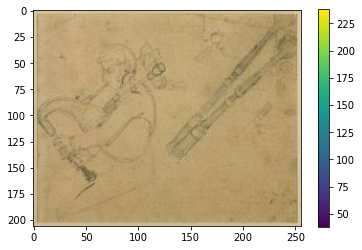

predicted as: ['actions: postures and motions', 'body', 'actions: processes and functions', 'diseases and conditions', 'named groups', 'named families', 'clothing and personal effects', 'fine art and design, named works', 'religious and ceremonial', 'reading, writing, printed matter', 'kitchen', 'fine arts and music', 'electrical appliances', 'domestic', 'scientific and measuring', 'heating and lighting', 'miscellaneous', 'tools and machinery', 'medical', 'materials', 'countries and continents', 'natural features (non-UK)', 'UK London', 'mythical, religious, fictional', 'UK man-made landmarks', 'man-made landmarks (non-UK)', 'bridges and viaducts', 'industrial', 'residential', 'garden structures', 'monuments', 'ruins', 'places of entertainment', 'agricultural', 'military', 'transport: water', 'transport: land', 'lifestyle and culture', 'dress: ceremonial/royal', 'family', 'health and welfare', 'crime and punishment', 'transport: air', 'dress: fantasy/fancy', 'water: inland', 'natural p

In [157]:
import random
from PIL import Image
import matplotlib.pyplot as plt
number = random.randrange(0, 4000, 1)
img  = Image.open(str(train_x[number]))
plt.figure()
plt.imshow(img)
plt.colorbar()
plt.grid(False)
plt.show()
print('predicted as:', predictions[number],
     '\nactual class:', actual[number])

In [158]:
import pandas as pd
with open('./results/training_flat_multilabel_VGGfine_tuned_deep.csv', 'rb') as infile:
    results = pd.read_csv(infile)
    
results

,epoch,binary_accuracy,categorical_accuracy,loss,macro_f1,precision,recall,val_binary_accuracy,val_categorical_accuracy,val_loss,val_macro_f1,val_precision,val_recall
0,0,0.960030,0.261944,0.129940,0.033374,0.051226,0.029668,0.964326,0.251000,0.114921,0.043582,0.068530,0.036651
1,1,0.964204,0.269778,0.114621,0.056150,0.086612,0.047401,0.964879,0.274667,0.110899,0.067681,0.094249,0.060878
2,2,0.965129,0.272389,0.109973,0.069509,0.107454,0.058310,0.965844,0.239000,0.108899,0.068750,0.111458,0.056127
3,3,0.965844,0.275778,0.106548,0.080234,0.122790,0.067332,0.965863,0.240667,0.108954,0.071259,0.113970,0.058611
4,4,0.966512,0.272944,0.103520,0.089766,0.135132,0.075791,0.966527,0.264667,0.105825,0.085364,0.129302,0.071112
5,5,0.967213,0.278500,0.100325,0.100068,0.147011,0.085188,0.966740,0.238667,0.104584,0.091898,0.138299,0.076744
6,6,0.967955,0.279111,0.097045,0.110595,0.159667,0.094800,0.966875,0.260667,0.105282,0.095399,0.145916,0.079011
7,7,0.968669,0.285389,0.093896,0.122149,0.173489,0.105293,0.966889,0.253667,0.105791,0.103840,0.156914,0.087347
8,8,0.969565,0.289889,0.090193,0.133070,0.185149,0.115593,0.966924,0.270667,0.105509,0.111455,0.160982,0.096133
9,9,0.970456,0.291278,0.086499,0.147037,0.201354,0.128285,0.967035,0.248667,0.107040,0.110400,0.159866,0.093763
